# Решение линейного стока


Для установившегося режима фильтрации давление в пласте не меняется. Для псевдо-установившегося режима постоянным остается перепад давления между пластом и забоем. После запуска, остановки или изменения режима работы скважины эти условия не выполняются. Давление в различных точках пласта может меняться по разному. Такой режим называют неустановившимся, а решения его описывающие нестационарными (зависят от времени).

Неустановившиеся решения уравнения фильтрации (transient solutions) представляют значительный практический интерес во многих задачах, включая задачи интерпретации ГДИС. В тоже время они относительно сложны и требуют применения компьютерных алгоритмов. В данном пособие проведение расчетов иллюстрируется с использованием python и макросов для Excel -- Unifloc VBA.

## Решение линейного стока (с использованием Ei)

Уравнение фильтрации для радиального потока в линеаризованном виде можно записать в виде

$$ 
\frac{\partial p}{\partial t} = 0.00036 \dfrac{k}{\varphi \mu c_t} \dfrac{1}{r} \left[ \dfrac{\partial}{\partial r} \left( r \dfrac{ \partial p} {\partial r} \right) \right]  
$$ {#eq-diff_eq_solution}

Напомним, здесь

-   $p$ - давление, атм
-   $t$ - время, час
-   $k$ - проницаемость в направлении движения потока, мД
-   $\mu$ - динамическая вязкость, сП
-   $\varphi$ - пористость, д.е.
-   $c_t$ - сжимаемость, 1/атм
-   $r$ - расстояние от центра, м

Часто для анализа уравнений неустановившейся фильтрации используются безразмерные переменные. Мы будем использовать переменные в виде:

$$ 
r_D = \frac{r}{r_w} 
$$
$$ 
t_D = \frac{0.00036 kt}{\varphi \mu c_t r_w^2}
$$
$$ 
p_D = \frac{kh}{ 18.42 q_{ref} B \mu} \left( p_i - p \right) 
$$
$$ 
q_D = \frac{q}{q_{ref}} 
$$

Здесь использованы практические метрические единицы измерения.

-   $r_w$ - радиус скважины, м
-   $r$ - расстояние от центра скважины до точки в пласте, м
-   $q_s$ - референсный дебит скважины на поверхности, приведенный к нормальным условиям м^3^/сут
-   $\varphi$ - пористость, доли единиц
-   $\mu$ - вязкость нефти в пласте, сП
-   $B$ - объемный коэффициент нефти, м^3^/м^3^
-   $p_i$ - начальное давление в пласте, атм
-   $p$ - давление забойное, атм
-   $c_t$ - общая сжимаемость системы в пласте, 1/атм


Использование безразмерных переменных позволяет упростить уравнение фильтрации, которое примет вид

$$  
\frac{\partial p_D}{ \partial t_D} = \dfrac{1}{r_D} \left[ \dfrac{\partial}{\partial r_D} \left( r_D \dfrac{ \partial p_D} {\partial r_D} \right) \right] 
$$ {#eq-diff_eq_solution_d}

Решение уравнения (@eq-diff_eq_solution_d) - функция безразмерного давления от безразмерных времени и расстояния $p_D(r_D, t_D, q_D)$.

Для решения уравнения фильтрации - линейного дифференциального уравнения в частных производных второго порядка необходимо задать начальные и граничные условия. Самое простое решение можно получить для случая вертикальной скважины бесконечно малого радиуса запускающейся с постоянным дебитом. Условия соответствующие этому случаю можно выразить следующим образом

-   начальное условие. До запуска скважины в момент времени $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$ 

$$ 
t_D < 0, p_D = 0 
$$ {#eq-initial_condition}

-   условие постоянства дебита на скважине - граничное условие на скважине 
$$ 
\lim_{r_D \to 0} {r_D \frac{\partial p_D}{\partial r_D}} = -q_D  
$$ {#eq-bound_condition_well}

-   условие на бесконечном расстоянии возмущения от скважине нет 
$$ 
r_D = \infty, p_D = 0 
$$ {#eq-bound_condition_inf}

В этом случае решение может быть выражено через функцию интегральной экспоненты 

::: callout-tip
## Решение линейного стока в безразмерных переменных
$$ 
p_D(r_D,t_D) = - \frac{q_D}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)
$$ {#eq-eq_solution_d}
:::

::: callout-tip
## Решение линейного стока с учетом логарифмической аппроксимации

$$
p_D(r_D,t_D) = \frac{q_D}{2} \left( ln \left( \dfrac{ t_D }{r_D^2}  \right) +0.809 \right) 
$$ {#eq-ln_solution_d}

при использовании данного уравнения, следует помнить, что приближенное решение применимо при $\dfrac{r_D^2}{4t_D} < 0.01$
:::

Решение линейного стока в размерных переменных

$$
p\left(r,t\right)=p_i-\frac{18.42q_sB\mu}{kh}\left(-\frac{1}{2}Ei\left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
$$ {#eq-ln_solution}


::: callout-tip
## Решение линейного стока с учетом логарифмической аппроксимации в размерных переменных

$$
p\left(r,t\right)=p_i-\frac{9.21q_sB\mu}{kh}\left(ln{\frac{kt}{\varphi\mu c_tr^2}}-7.12\right)
$$ {#eq-ei_solution_full}

верно при 

$$
\frac{kt}{\varphi\mu c_tr^2}>70000 
$$ {#eq-eq_sol_condition}
:::

Решения приведены для практических метрических единиц измерения, что можно увидеть по размерному коэффициенту.

Нестационарное решение с учетом скин-фактора будет иметь вид

$$ 
P(r, t) = P_{i} - \frac {9.21 {q_s} B\mu }{k h}(\ ln\frac {k t}{ \varphi \mu {c_t} {r^2}} -7.12 + 2S) 
$$ {#eq-ln_solution_2}

### Построение графиков решения в безразмерных координатах

In [1]:
#| code-fold: false
 
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import scipy.special as sc
"""
Решение линейного стока уравнения фильтрации
"""
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)

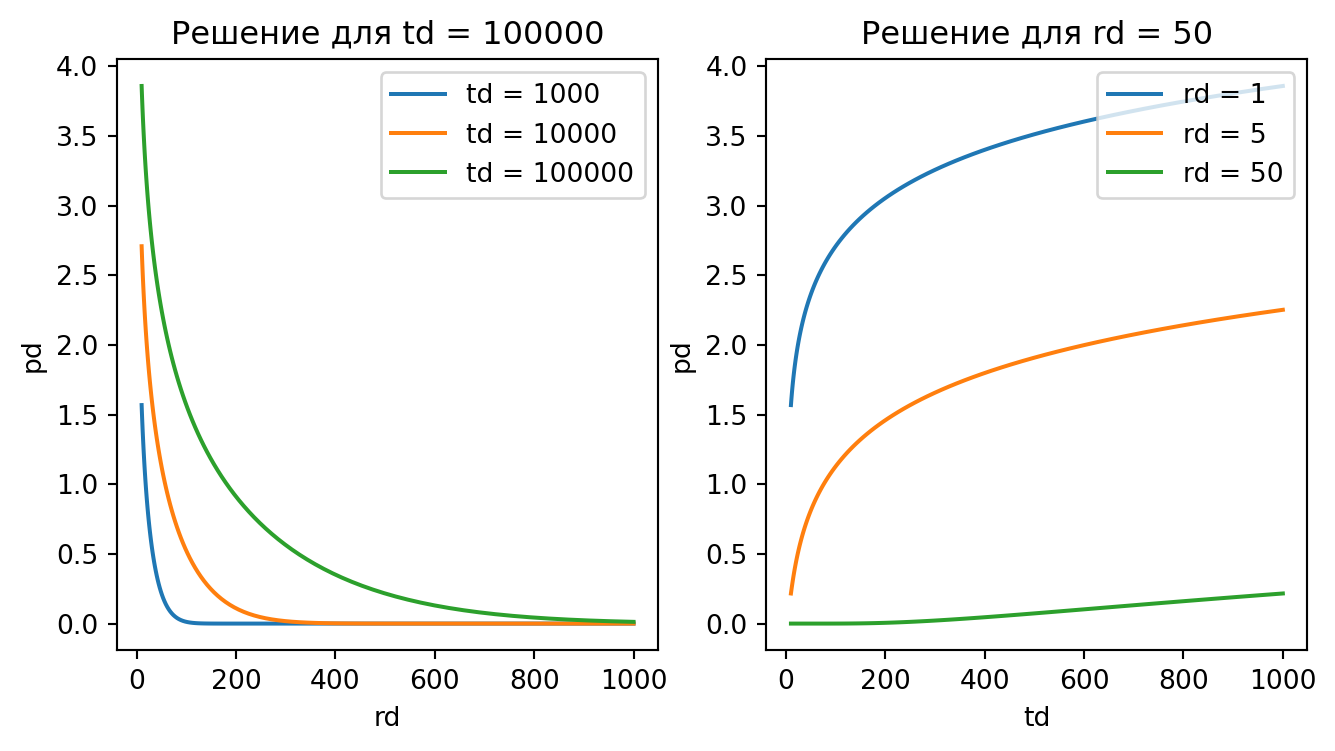

In [2]:
#| label: fig-transient_sol_dimensionless_1
#| fig-cap: Решение линейного стока в безразмерных переменных
"""
построим графики решения линейного стока
в безразмерных переменных
"""
rd_arr = np.logspace(1, 3, 100)
td_arr = np.logspace(1, 3, 100)

# при построении используем векторный расчет
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
for td in [1000, 10000, 100000]:
    ax1.plot(rd_arr, pd_ei(td, rd_arr), label=f"td = {td}" )
ax1.set_title("Решение для td = {}".format(td))
ax1.set_xlabel("rd")
ax1.set_ylabel("pd")
ax1.legend()

for rd in (1, 5 , 50):
    ax2.plot(td_arr, pd_ei(td_arr, rd), label=f"rd = {rd}" )
ax2.set_title("Решение для rd = {}".format(rd))
ax2.set_xlabel("td")
ax2.set_ylabel("pd")
ax2.legend()
plt.show()

### Построение графиков решения в размерных координатах

In [3]:
#| echo: false
# импортируем ранее определенные расчетные функции
import sys
sys.path.append('..') # модуль с функциями располагается на уровень выше скрипта
from welltest import functions as wf

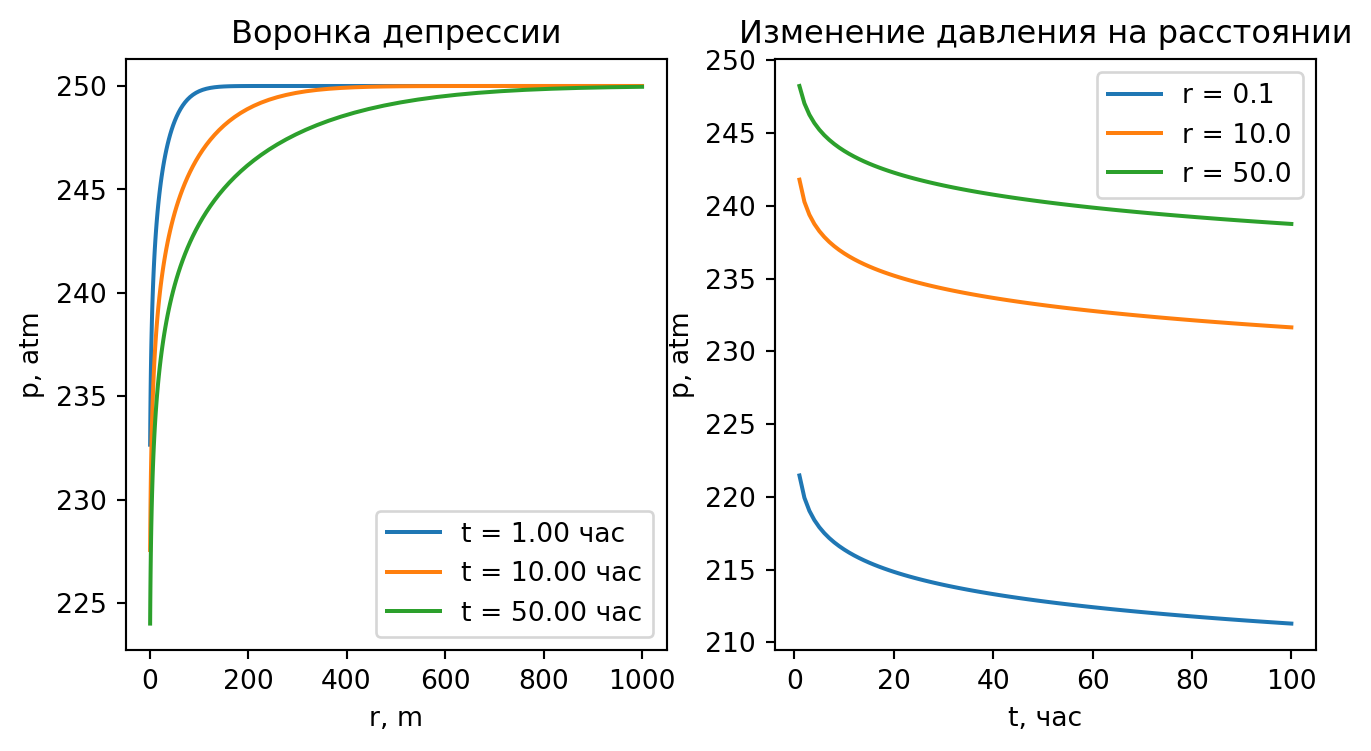

In [4]:
#| label: fig-transient_sol_dimensionless_2
#| fig-cap: Решение линейного стока в размерных переменных
"""
Построим графики распределения давления и изменения давления
в размерных координатах
"""
# исходные данные для построения графиков
h_m=10 
q_sm3day=20 
b_m3m3=1.2 
mu_cP=1 
pi_atma=250
rw_m=0.1
k_mD=10, 
phi=0.2
ct_1atm=1e-5

r_arr = np.logspace(0.1, 3, 100)
rd_arr = wf.rd_from_r(r_arr, rw_m=rw_m)
t_arr = np.linspace(1, 100, 100)
td_arr = wf.td_from_t(t_arr, 
                      k_mD=k_mD, 
                      phi=phi, 
                      mu_cP=mu_cP, 
                      ct_1atm=ct_1atm, 
                      rw_m=rw_m)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

for td in wf.td_from_t(np.array([1, 10, 50]), 
                      k_mD=k_mD, 
                      phi=phi, 
                      mu_cP=mu_cP, 
                      ct_1atm=ct_1atm, 
                      rw_m=rw_m):
    ax1.plot(r_arr, 
             wf.p_from_pd_atma(pd=pd_ei(td,rd_arr), 
                               h_m=h_m, 
                               q_sm3day=q_sm3day, 
                               b_m3m3=b_m3m3, 
                               mu_cP=mu_cP, 
                               pi_atma=pi_atma), 
             label=f"t = {wf.t_from_td_hr(td, k_mD=k_mD, phi=phi, mu_cP=mu_cP,      ct_1atm=ct_1atm, rw_m=rw_m)[0]:.2f} час")
ax1.set_title("Воронка депрессии")
ax1.set_xlabel("r, m")
ax1.set_ylabel("p, atm")
ax1.legend()

for rd in wf.rd_from_r(np.array([rw_m, 10, 50])):
    ax2.plot(t_arr, 
             wf.p_from_pd_atma(pd=pd_ei(td_arr, rd), 
                               h_m=h_m, 
                               q_sm3day=q_sm3day, 
                               b_m3m3=b_m3m3, 
                               mu_cP=mu_cP, 
                               pi_atma=pi_atma),
             label=f"r = {wf.r_from_rd_m(rd, rw_m=rw_m)}" )
ax2.set_title("Изменение давления на расстоянии")
ax2.set_xlabel("t, час")
ax2.set_ylabel("p, atm")
ax2.legend()

plt.show()

## Суперпозиция по времени

### Запуск и остановка скважины

### Произвольная история работы

### Интеграл Дюамеля

## Решение для линейного меняющегося дебита

### Кусочно линейное решение для произвольной истории дебитов

## Радиус влияния, логарифмическая аппроксимация решения

То, что ниже наверное надо вынести в отдельную главу, чтобы не повторяться для более сложных решений
## Суперпозиция по пространству

### Работа нескольких скважин

## Влияние границ

Разные примеры решений с границами и соответствующие графики